# Final Project

Breast Cancer Classification ([Datasets](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)))

Attribute Information: (class attribute has been moved to last column)

No.| Attribute|Domain
---|---|--- 
1|Sample code number|id number
2|Clump Thickness|1 - 10
3|Uniformity of Cell Size|1 - 10
4|Uniformity of Cell Shape |1 - 10
5|Marginal Adhesion|1 - 10
6|Single Epithelial Cell Size|1 - 10
7|Bare Nuclei|1 - 10
8|Bland Chromatin|1 - 10
9|Normal Nucleoli|1 - 10
10|Mitoses| 1 - 10
11|Class|(2 for benign, 4 for malignant)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [2]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Load Dataset

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.csv', 
                 names=['id', 'clump_thickness', 'cell_size', 'cell_shape',
                        'marginal_adhesion', 'single_epithelial_cell_size',
                        'bare_nuclei', 'bland_chromatin', 'normal_nucleoli',
                        'mitoses', 'class'])
df

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Exploratory Data Analysis

In [4]:
print(f'Total Data : {df.shape[0]}')
print(f'Total Kolom : {df.shape[1]}')

Total Data : 699
Total Kolom : 11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   cell_size                    699 non-null    int64 
 3   cell_shape                   699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.nunique()

id                             645
clump_thickness                 10
cell_size                       10
cell_shape                      10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     11
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64

In [8]:
df.isnull().sum()

id                             0
clump_thickness                0
cell_size                      0
cell_shape                     0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [9]:
df.duplicated().sum()

8

In [10]:
df[df.duplicated()]

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


### Handling Outliers

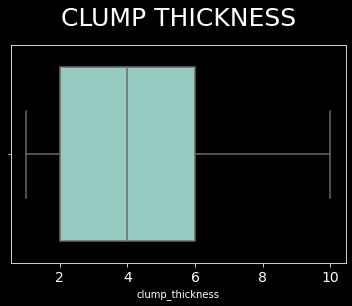

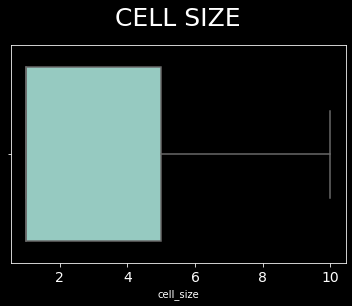

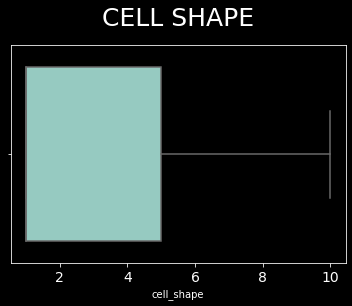

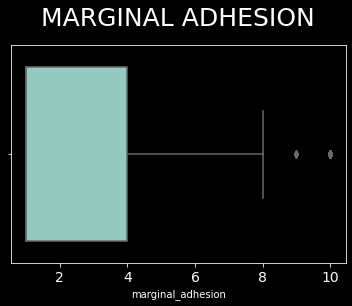

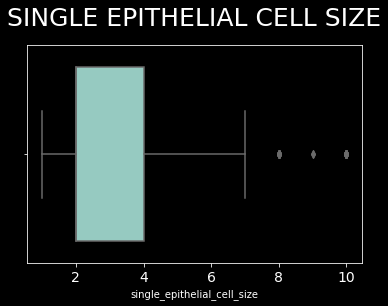

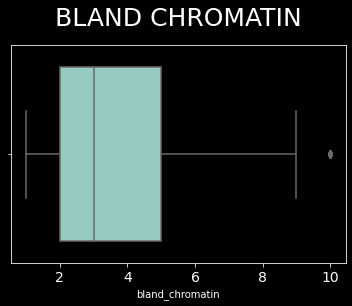

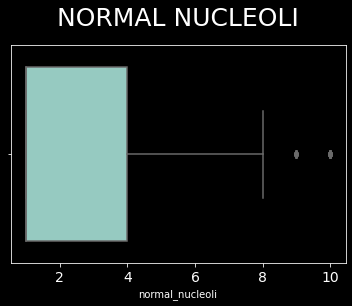

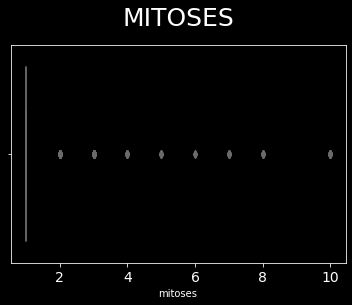

In [11]:
columns = df.drop(['id', 'bare_nuclei','class'], axis=1)
for column in columns:
    sns.boxplot(data=columns, x=column)
    plt.title(column.upper().replace('_', ' '), fontsize=25, pad=20)
    plt.xticks(size=14)
    plt.show()

In [12]:
def data_outlier(df):
    for k, v in df.items():
        Q1        = v.quantile(0.25)
        Q3        = v.quantile(0.75)
        IQR       = Q3 - Q1
        v_range   = v[(v <= Q1 - 1.5 * IQR) | (v >= Q3 + 1.5 * IQR)]
        perc      = np.shape(v_range)[0] * 100.0 / df.shape[0]  
        print(f'Column :{k.upper()} =====> Outliers = {perc:.2f}%')

In [13]:
data_outlier(columns)

Column :CLUMP_THICKNESS =====> Outliers = 0.00%
Column :CELL_SIZE =====> Outliers = 0.00%
Column :CELL_SHAPE =====> Outliers = 0.00%
Column :MARGINAL_ADHESION =====> Outliers = 8.58%
Column :SINGLE_EPITHELIAL_CELL_SIZE =====> Outliers = 9.44%
Column :BLAND_CHROMATIN =====> Outliers = 2.86%
Column :NORMAL_NUCLEOLI =====> Outliers = 11.02%
Column :MITOSES =====> Outliers = 100.00%


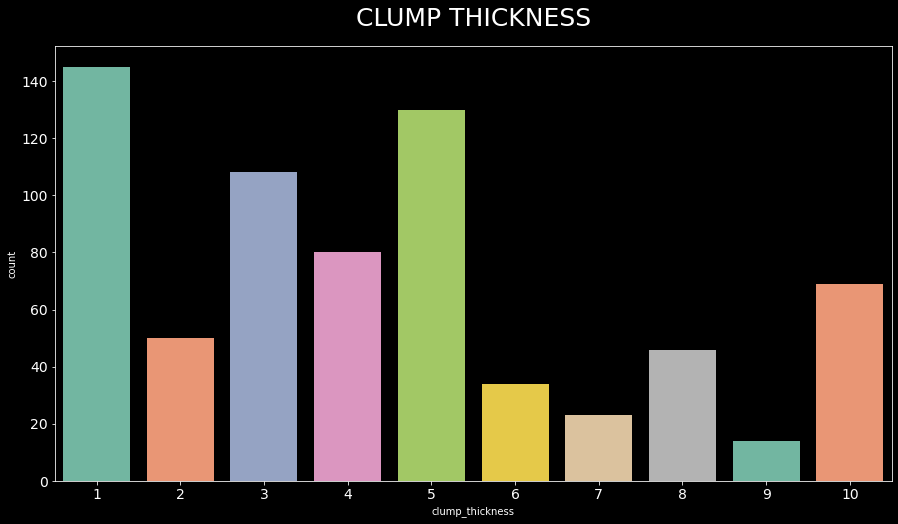

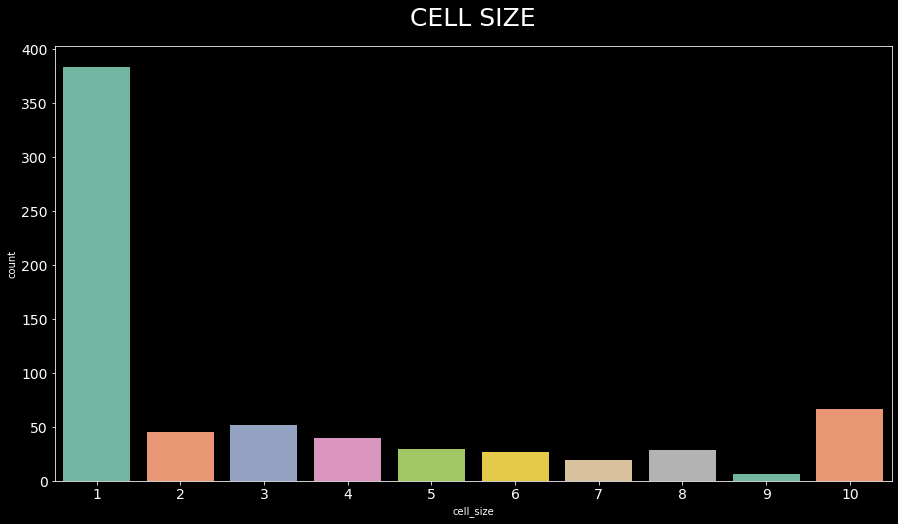

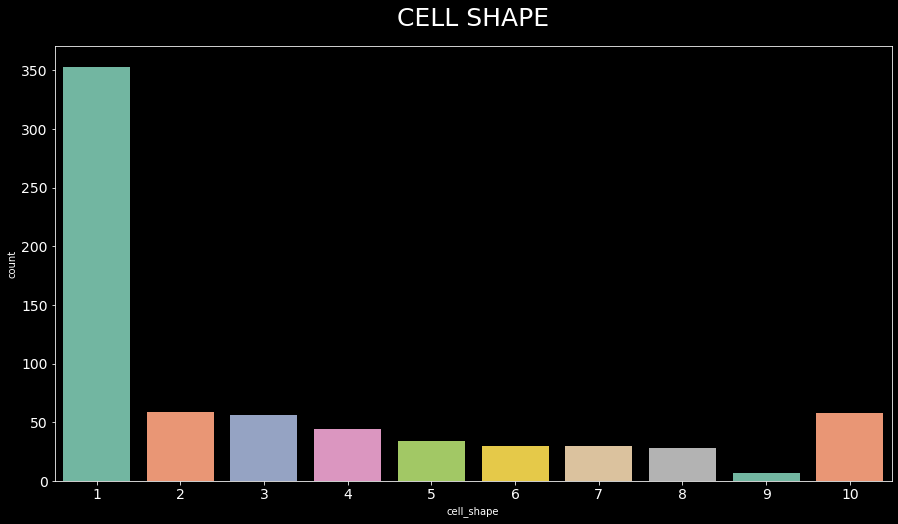

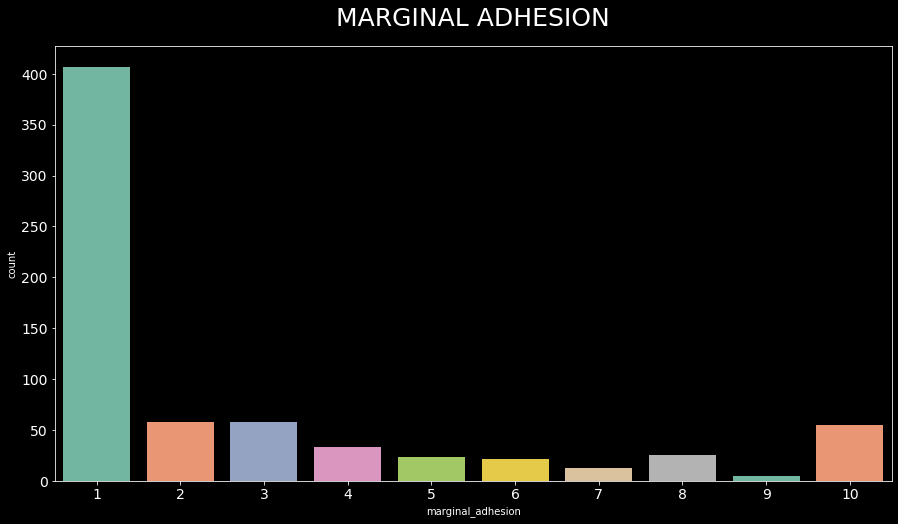

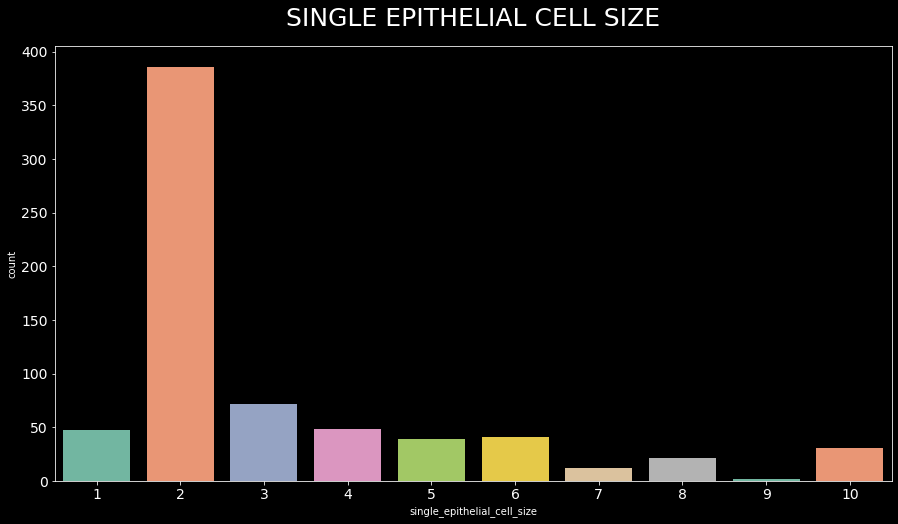

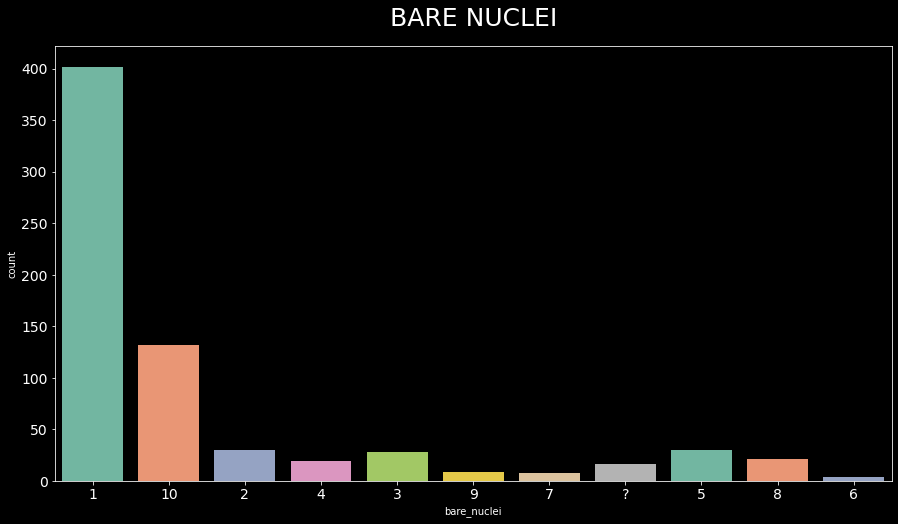

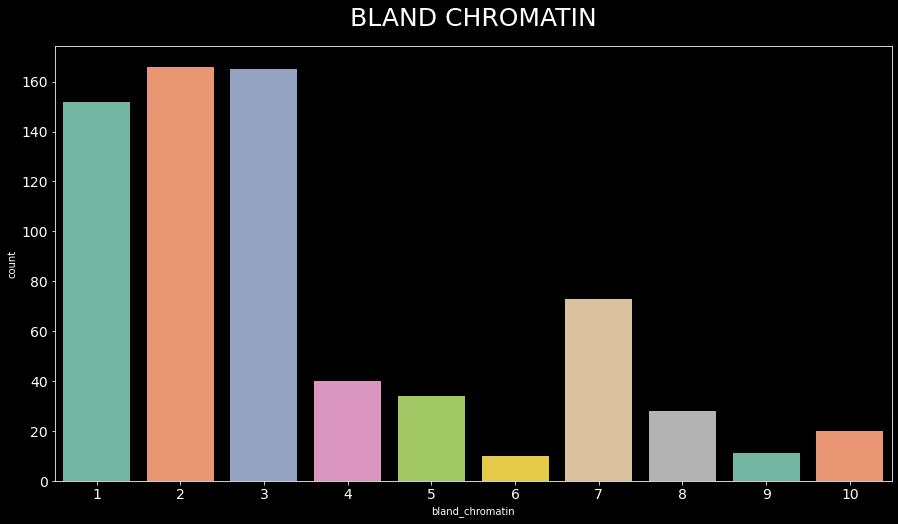

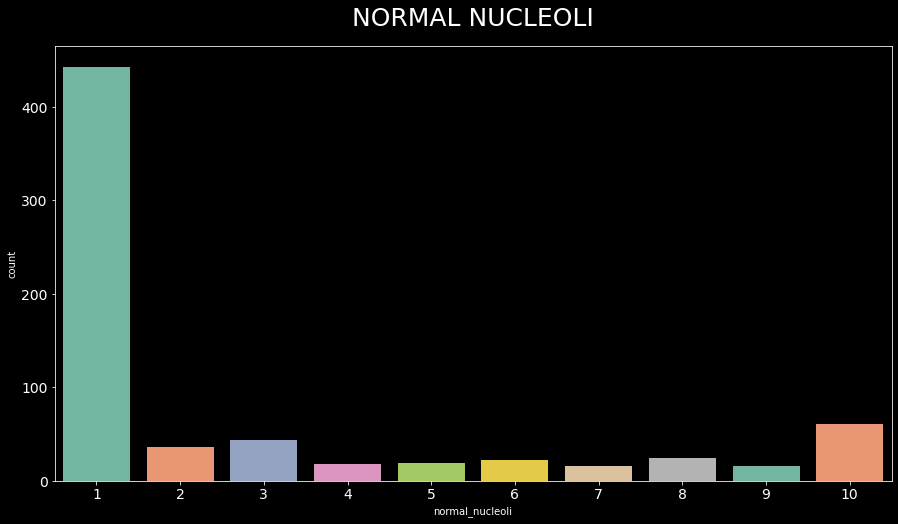

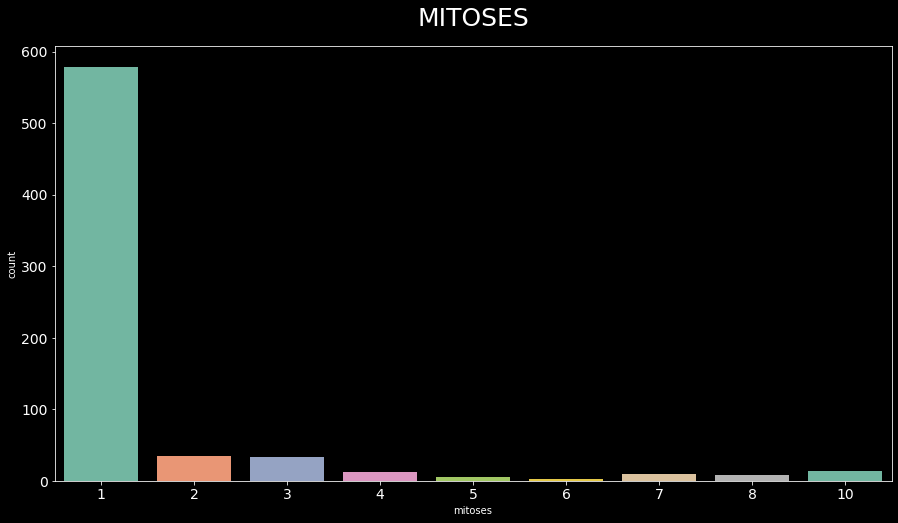

In [14]:
columns = df.drop(['id','class'], axis=1)
for column in columns.columns :
    plt.figure(figsize=(15,8))
    sns.countplot(data=columns, x=columns[column] , palette='Set2')
    plt.title(column.upper().replace('_', ' '), fontsize=25, pad=20)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

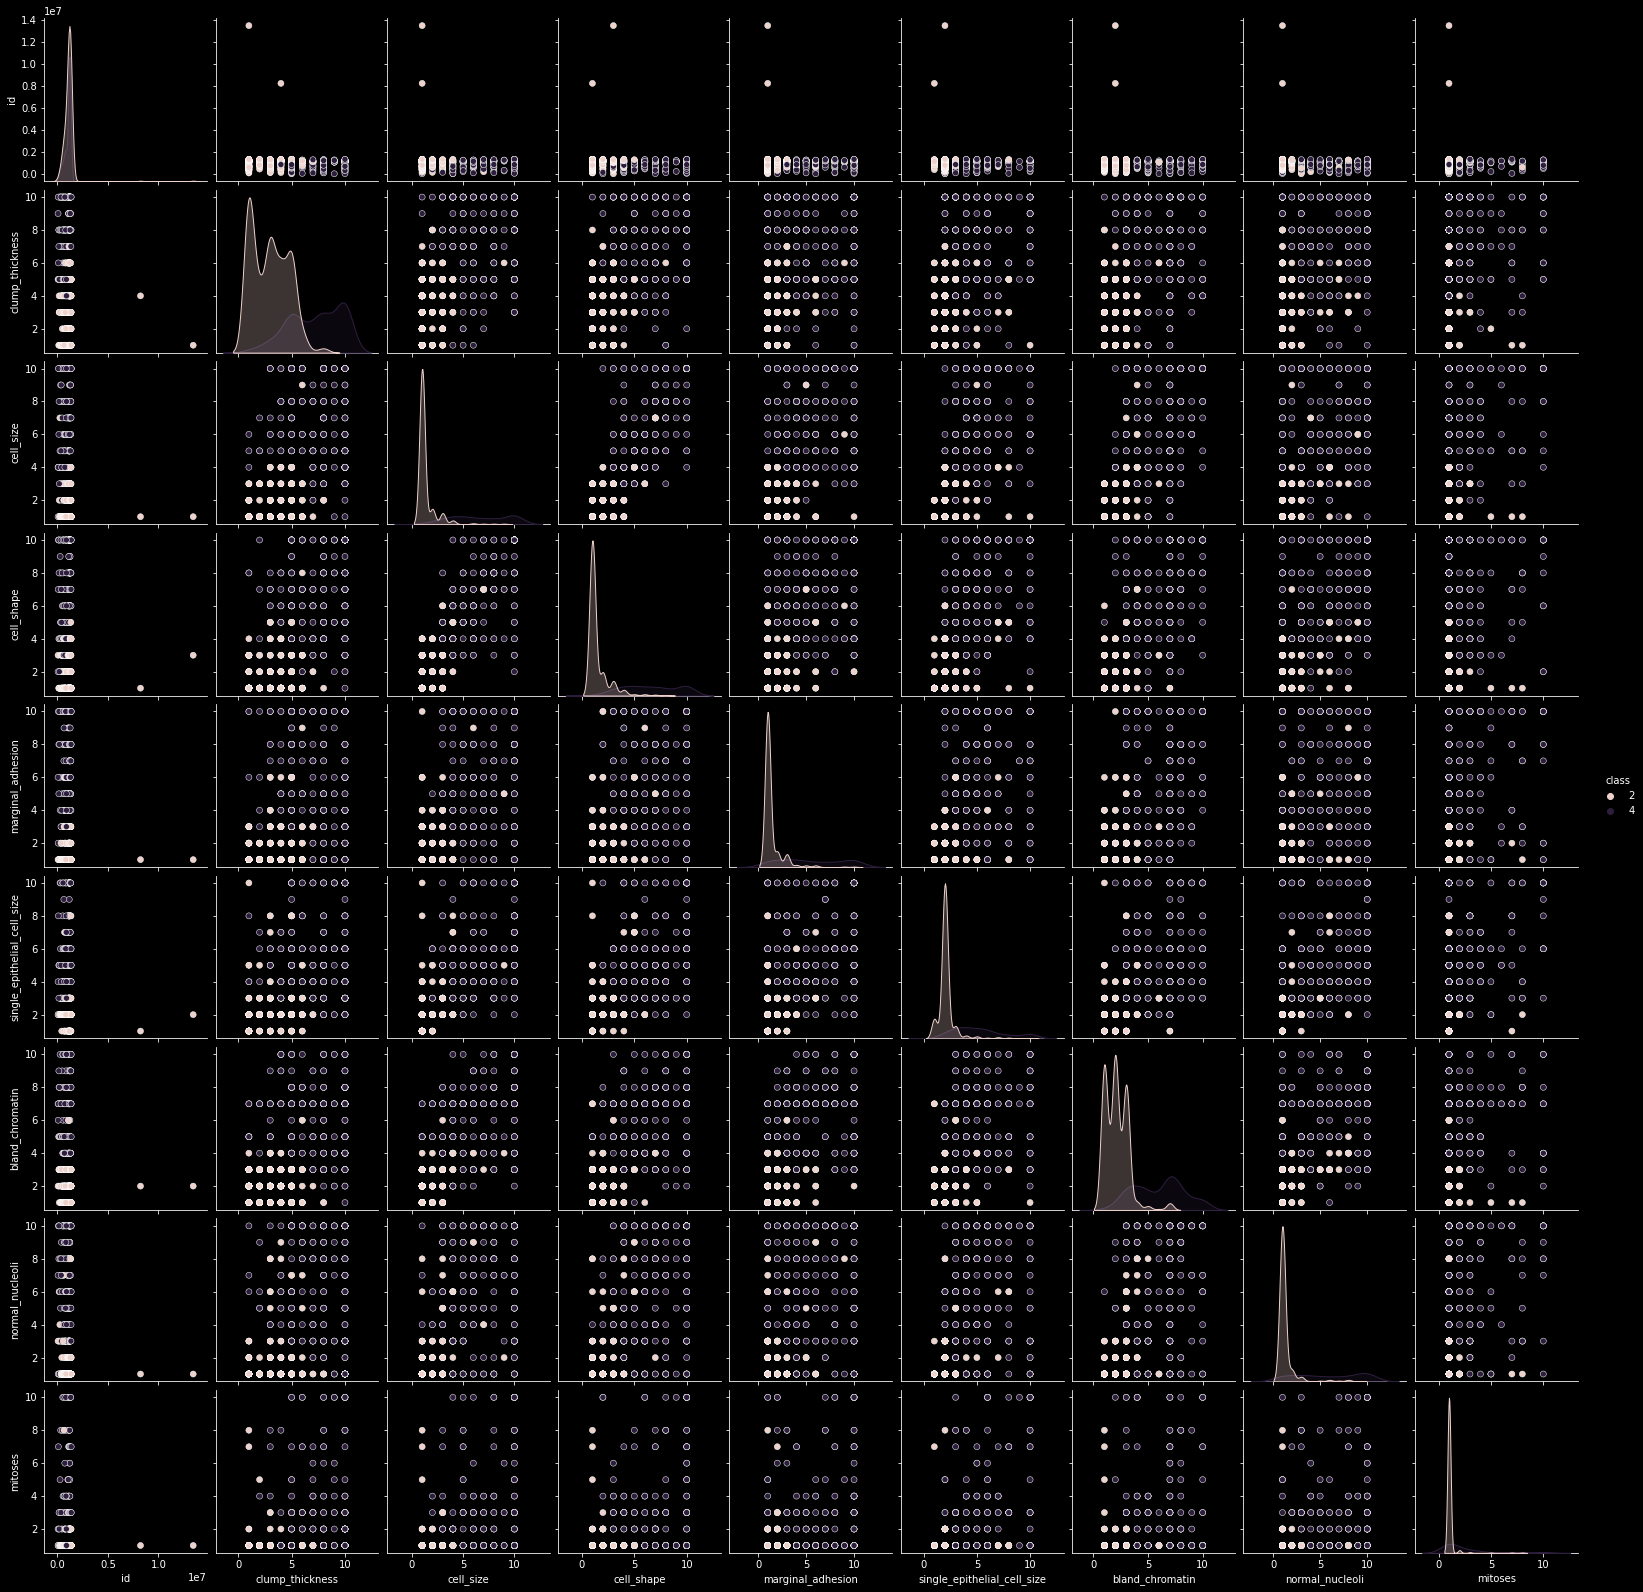

In [15]:
sns.pairplot(data=df, hue='class')
plt.show()

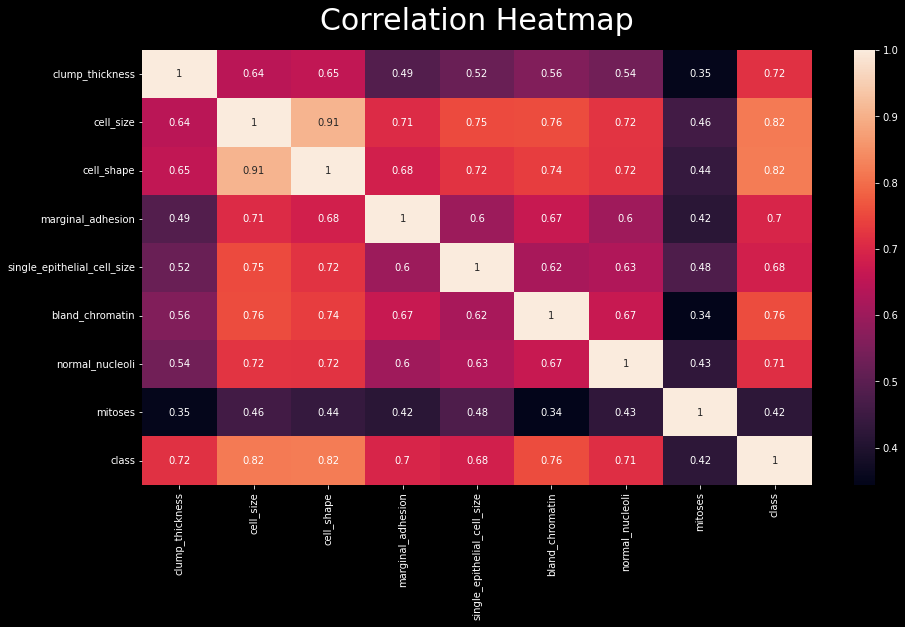

In [16]:
correlation = df.drop('id', axis=1)
correlation = correlation.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation, annot=True)
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

In [17]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

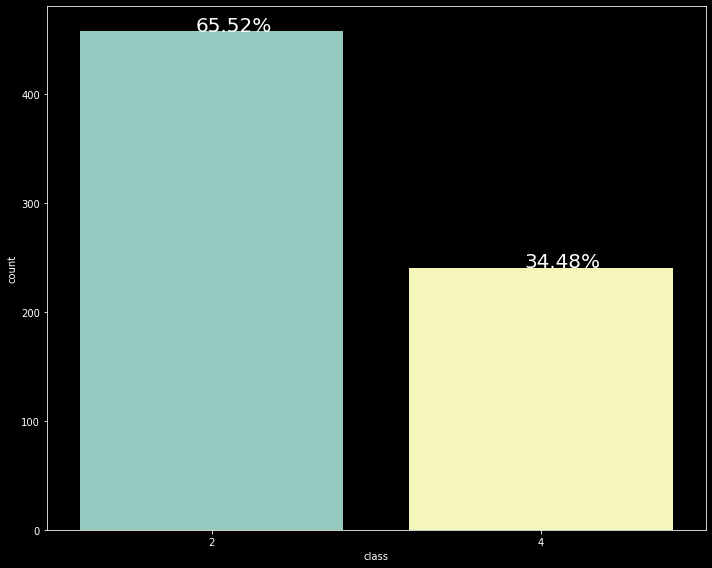

In [18]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='class',  data=df)
total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x          = p.get_x() + p.get_width() / 2-0.05 
    y          = p.get_y() + p.get_height()
    ax.annotate(f'{percentage}', (x,y), fontsize=20)
    plt.tight_layout()

### Data Preparation

In [19]:
# Dropping un-needed feature
df.drop(['id','mitoses'], axis=1, inplace=True)

In [20]:
# Handling bare_nuclei
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [21]:
# Dropping '?' value
df = df[df['bare_nuclei'] != '?']
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [22]:
df = df.astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              683 non-null    int64
 1   cell_size                    683 non-null    int64
 2   cell_shape                   683 non-null    int64
 3   marginal_adhesion            683 non-null    int64
 4   single_epithelial_cell_size  683 non-null    int64
 5   bare_nuclei                  683 non-null    int64
 6   bland_chromatin              683 non-null    int64
 7   normal_nucleoli              683 non-null    int64
 8   class                        683 non-null    int64
dtypes: int64(9)
memory usage: 53.4 KB


In [24]:
# Handling outliers

def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

# Find Z-score
from scipy.stats import zscore
z=np.abs(zscore(df[df.columns]))

# Call Function
threshold(z,df[df.columns])

With threshold 3.0 data loss is 4.54%
With threshold 3.2 data loss is 0.0%
With threshold 3.4 data loss is 0.0%
With threshold 3.6 data loss is 0.0%
With threshold 3.8 data loss is 0.0%
With threshold 4.0 data loss is 0.0%
With threshold 4.2 data loss is 0.0%
With threshold 4.4 data loss is 0.0%
With threshold 4.6 data loss is 0.0%
With threshold 4.8 data loss is 0.0%


In [25]:
new_df = df[(z < 3.0).all(axis=1)]

print(f'Total Data before Handling outliers : {df.shape[0]}')
print(f'Total Data after Handling outliers : {new_df.shape[0]}')

Total Data before Handling outliers : 683
Total Data after Handling outliers : 652


### Handling Imbalance Data

In [26]:
from imblearn.over_sampling import SMOTE
x = new_df.loc[:, new_df.columns != 'class']
y = new_df['class']

seed = 78
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

x_res, y_res = sm.fit_resample(x, y)

In [27]:
new_df_fix = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)],axis=1)

In [28]:
new_df_fix['class'].value_counts()

2    443
4    443
Name: class, dtype: int64

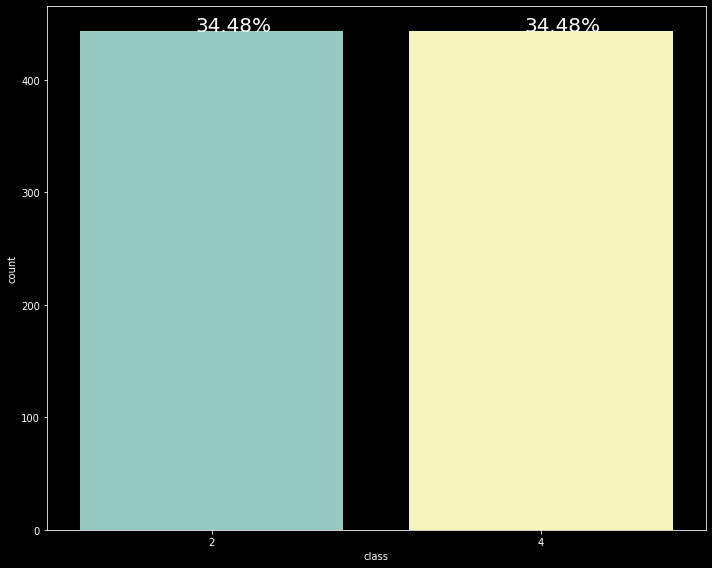

In [29]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='class',  data=new_df_fix)
total = df.shape[0]
for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x          = p.get_x() + p.get_width() / 2-0.05 
    y          = p.get_y() + p.get_height()
    ax.annotate(f'{percentage}', (x,y), fontsize=20)
    plt.tight_layout()

### Splitting the data

In [30]:
X = new_df_fix.drop('class', axis=1)
y = new_df_fix['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
print(f'Total Training data : {X_train.shape[0]}')
print(f'Total Testing data : {X_test.shape[0]}')

Total Training data : 708
Total Testing data : 178


### Normalization

In [32]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train

array([[-0.32017532, -0.88721915, -0.93626935, ..., -0.88876043,
        -1.17091362, -0.76441803],
       [-1.35526268, -0.56640651, -0.27668855, ..., -0.88876043,
        -1.17091362, -0.76441803],
       [-1.35526268, -0.56640651, -0.27668855, ..., -0.88876043,
        -0.77139225, -0.76441803],
       ...,
       [ 1.40497026,  1.35846936,  1.70205384, ..., -0.88876043,
        -0.37187088, -0.76441803],
       [ 0.02485379, -0.56640651, -0.93626935, ..., -0.88876043,
        -1.17091362, -0.76441803],
       [ 1.74999938, -0.24559386, -0.27668855, ...,  1.42179911,
         1.2262146 , -0.15426249]])

In [69]:
X_test

array([[-1.35526268, -0.88721915, -0.93626935, ..., -0.88876043,
        -0.77139225, -0.76441803],
       [ 0.02485379, -0.88721915, -0.93626935, ..., -0.88876043,
        -0.37187088, -0.45934026],
       [-1.35526268,  0.71684407,  1.70205384, ...,  1.42179911,
         0.02765049,  1.37112637],
       ...,
       [-0.66520444, -0.88721915, -0.93626935, ..., -0.88876043,
        -0.77139225, -0.76441803],
       [-0.66520444, -0.88721915, -0.93626935, ..., -0.88876043,
        -0.77139225, -0.76441803],
       [ 0.02485379, -0.88721915, -0.93626935, ..., -0.88876043,
        -1.17091362, -0.76441803]])

### Build the model

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# function check metrix evalute
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'{name.upper()} TRAINING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_train, y_train))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_train, y_train_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_train, y_train_pred))

    print('\n======================================================')

    print(f'\n {name.upper()} TESTING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_test, y_test))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_test, y_test_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_test, y_test_pred))

In [35]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [36]:
# Feature Importance (Random Forest)
def feature_importance(model_rf):
    X_ = np.array(X)
    importance_scores = model_rf.feature_importances_
    indices = np.argsort(importance_scores)

    plt.figure(figsize=(15, 10))
    feature_importances = pd.Series(model.feature_importances_, index=[X])
    feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance using Random Forest')
    plt.show()

In [37]:
# Function Confusion Matrix
def check_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(15, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

### Support Vector Machine

In [38]:
from sklearn.svm import SVC

# using StandarScaler
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [39]:
model_dict = {'SVM': model_svc}

evaluate_model(model_dict)

,Training,Testing
SVM,0.977401,0.966292


In [40]:
params = {
    'C': [0.01, 0.1, 0.5, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid']
}

In [41]:
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [42]:
bestparams = grid.best_params_
print(f'best parameter = {bestparams}')

best parameter = {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}


In [43]:
model_svc_tuning = SVC(**bestparams)
model_svc_tuning.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='poly')

In [44]:
model_dict = {
    'SVM': model_svc,
    'TSVM': model_svc_tuning,
}

evaluate_model(model_dict)

,Training,Testing
SVM,0.977401,0.966292
TSVM,0.984463,0.977528


In [45]:
nama = 'Support Vector Machine'.upper()
model = model_svc_tuning

evaluation(nama, model)

SUPPORT VECTOR MACHINE TRAINING RESULT:
Accuracy: 0.9844632768361582
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       1.00      0.97      0.98       348
           4       0.97      1.00      0.98       360

    accuracy                           0.98       708
   macro avg       0.98      0.98      0.98       708
weighted avg       0.98      0.98      0.98       708

Confussion Matrix ------------------------------------
[[338  10]
 [  1 359]]


 SUPPORT VECTOR MACHINE TESTING RESULT:
Accuracy: 0.9775280898876404
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        95
           4       0.95      1.00      0.98        83

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

Confussion Matrix 

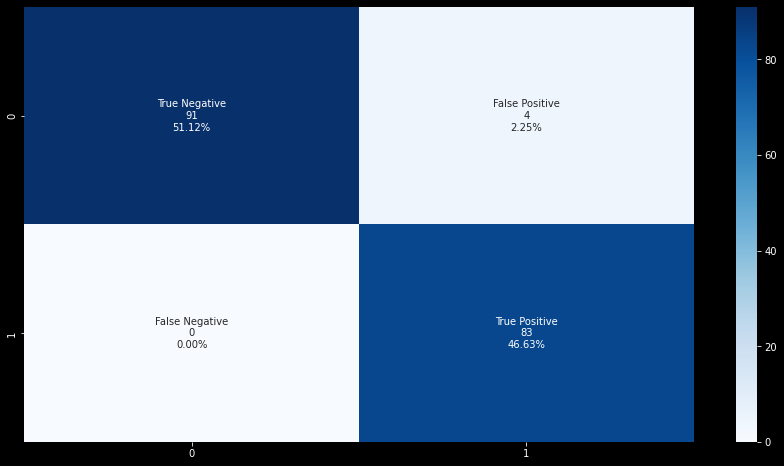

In [46]:
check_confusion_matrix(model)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [48]:
model_dict = {
    'Random Forest' : model_rf
}

evaluate_model(model_dict)

,Training,Testing
Random Forest,0.971751,0.977528


In [49]:
nama = 'Random Forest'.upper()
model = model_rf

evaluation(nama, model)

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.9717514124293786
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       0.99      0.95      0.97       348
           4       0.96      0.99      0.97       360

    accuracy                           0.97       708
   macro avg       0.97      0.97      0.97       708
weighted avg       0.97      0.97      0.97       708

Confussion Matrix ------------------------------------
[[332  16]
 [  4 356]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.9775280898876404
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        95
           4       0.95      1.00      0.98        83

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

Confussion Matrix ------------------

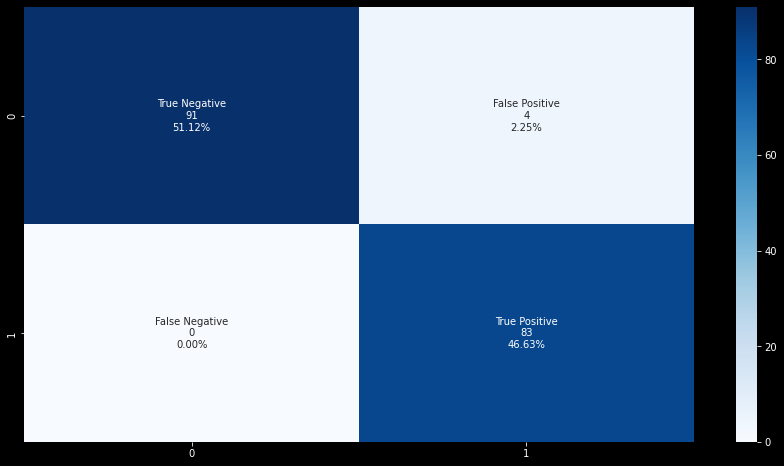

In [50]:
check_confusion_matrix(model)

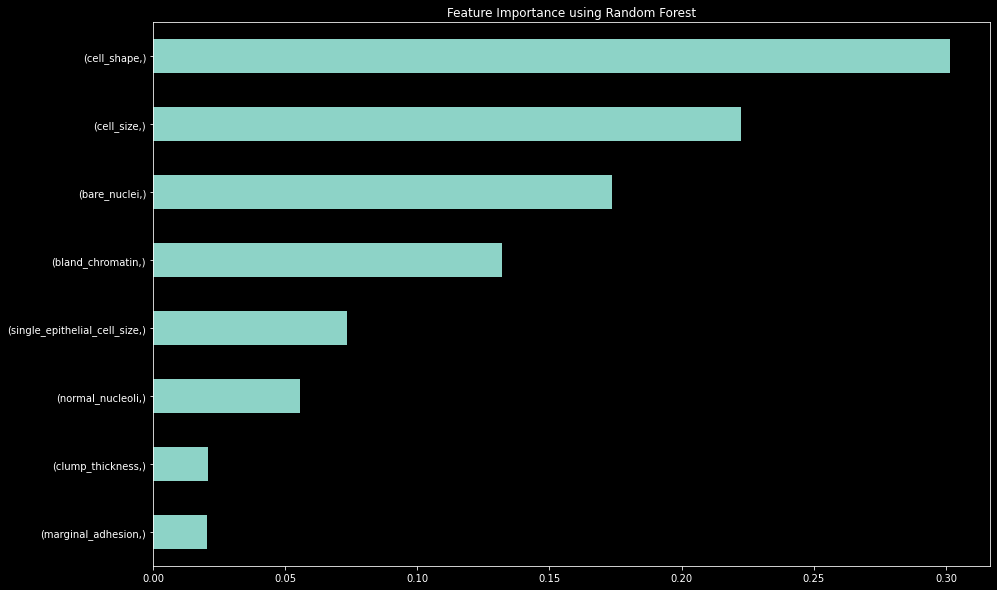

In [51]:
feature_importance(model)

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
model_dict = {
    'Logistic Regression' : model_lr
}

evaluate_model(model_dict)

,Training,Testing
Logistic Regression,0.975989,0.97191


In [55]:
nama = 'Logistic Regression'.upper()
model = model_lr

evaluation(nama, model)

LOGISTIC REGRESSION TRAINING RESULT:
Accuracy: 0.9759887005649718
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       348
           4       0.98      0.97      0.98       360

    accuracy                           0.98       708
   macro avg       0.98      0.98      0.98       708
weighted avg       0.98      0.98      0.98       708

Confussion Matrix ------------------------------------
[[340   8]
 [  9 351]]


 LOGISTIC REGRESSION TESTING RESULT:
Accuracy: 0.9719101123595506
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        95
           4       0.95      0.99      0.97        83

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

Confussion Matrix ------

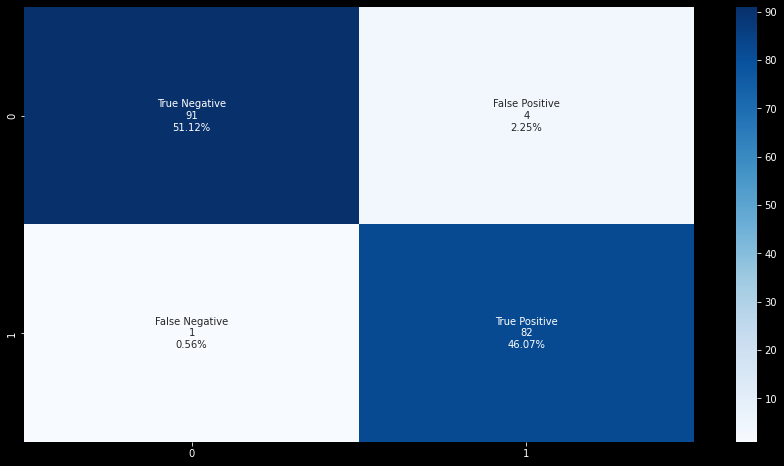

In [56]:
check_confusion_matrix(model)

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [59]:
model_dict = {
    'Naive Bayes' : model_nb
}

evaluate_model(model_dict)

,Training,Testing
Naive Bayes,0.966102,0.960674


In [60]:
nama = 'Naive Bayes'.upper()
model = model_nb

evaluation(nama, model)

NAIVE BAYES TRAINING RESULT:
Accuracy: 0.9661016949152542
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       348
           4       0.96      0.97      0.97       360

    accuracy                           0.97       708
   macro avg       0.97      0.97      0.97       708
weighted avg       0.97      0.97      0.97       708

Confussion Matrix ------------------------------------
[[335  13]
 [ 11 349]]


 NAIVE BAYES TESTING RESULT:
Accuracy: 0.9606741573033708
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       0.97      0.96      0.96        95
           4       0.95      0.96      0.96        83

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

Confussion Matrix ----------------------

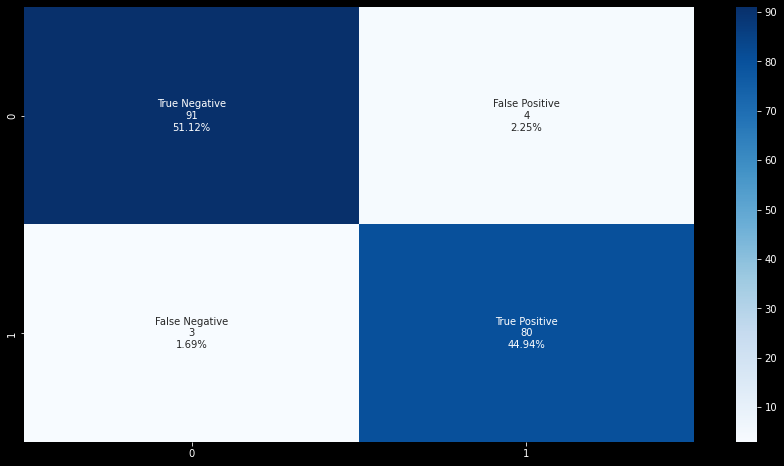

In [61]:
check_confusion_matrix(model)

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
model_dict = {
    'Decision Tree' : model_dt
}

evaluate_model(model_dict)

,Training,Testing
Decision Tree,1.0,0.960674


In [65]:
nama = 'Decision Tree'.upper()
model = model_dt

evaluation(nama, model)

DECISION TREE TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       348
           4       1.00      1.00      1.00       360

    accuracy                           1.00       708
   macro avg       1.00      1.00      1.00       708
weighted avg       1.00      1.00      1.00       708

Confussion Matrix ------------------------------------
[[348   0]
 [  0 360]]


 DECISION TREE TESTING RESULT:
Accuracy: 0.9606741573033708
Classification Report --------------------------------
              precision    recall  f1-score   support

           2       1.00      0.93      0.96        95
           4       0.92      1.00      0.96        83

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

Confussion Matrix ---------------------------------

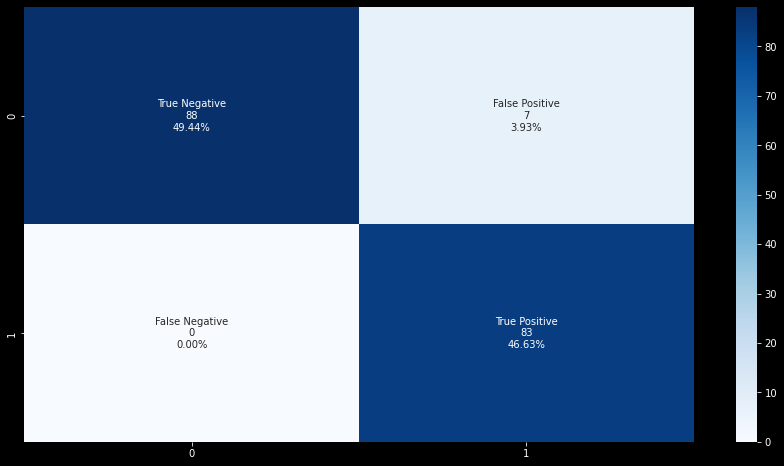

In [66]:
check_confusion_matrix(model)

### Model Comparison

In [67]:
model_dict = {
    'Support Vector Machine' : model_svc_tuning,
    'Random Forest' : model_rf,
    'Logistic Regression' : model_lr,
    'Naive Bayes' : model_nb,
    'Decision Tree' : model_dt 
}

evaluate_model(model_dict)

,Training,Testing
Support Vector Machine,0.984463,0.977528
Random Forest,0.971751,0.977528
Logistic Regression,0.975989,0.97191
Naive Bayes,0.966102,0.960674
Decision Tree,1.0,0.960674
